In [69]:
import scanpy as sc
import hacca
from hacca import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from STalign import STalign
## import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import plotly
import requests

# make plots bigger
import os, sys
print(sys.executable) # works this time
print(sys.version)
print(sys.version_info)
import scanpy as sc
from sklearn.cross_decomposition import CCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
from scipy.sparse import csr_matrix
import numpy as np
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler

i:\mutiomics\pythonProject\.venv\Scripts\python.exe
3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)


In [70]:
#### dir name
cwd="I:\\mutiomics\\data"
data_path = os.path.join(cwd, 'pseudo_revision_2\\m3\\benchmark_m3')
work_dir = os.path.join(cwd, 'pseudo_revision_2\\m3\\work_dir')
if not os.path.exists(work_dir):
    os.makedirs(work_dir)

a_h5ad = sc.read_h5ad(os.path.join(data_path, "new_adata_maldi_10.h5ad"))
b_prime_h5ad = sc.read_h5ad(os.path.join(data_path,"new_adata_st_10.h5ad"))

a AnnData object with n_obs × n_vars = 2000 × 3658
    obs: 'b_prime_label', 'leiden', 'clusters', 'spatialX', 'spatialY'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'a_label_colors', 'clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
b_prime AnnData object with n_obs × n_vars = 2000 × 15630
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


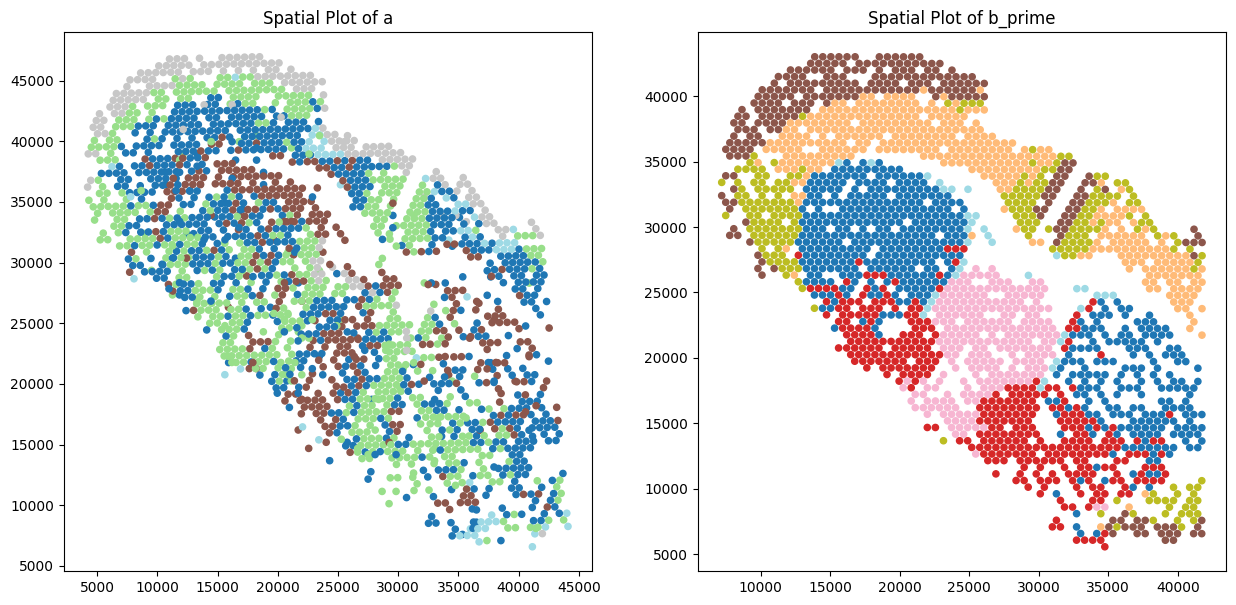

In [71]:
a_h5ad.obs["leiden"] = a_h5ad.obs["clusters"]
b_prime_h5ad.obs["leiden"] = b_prime_h5ad.obs["clusters"]
print("a",a_h5ad)
print("b_prime",b_prime_h5ad)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].scatter(a_h5ad.obsm["spatial"][:,0], a_h5ad.obsm["spatial"][:,1], c=a_h5ad.obs['leiden'].astype(int), cmap='tab20', s=20, alpha=1,)
axs[0].set_title('Spatial Plot of a')
axs[1].scatter(b_prime_h5ad.obsm["spatial"][:,0], b_prime_h5ad.obsm["spatial"][:,1], c=b_prime_h5ad.obs['leiden'].astype(int), cmap='tab20', s=20, alpha=1)
axs[1].set_title('Spatial Plot of b_prime')
plt.show()

In [72]:
b_prime_spatial = pd.DataFrame(b_prime_h5ad.obsm['spatial'])
scaledata = hacca.center_and_scale(b_prime_spatial)
b_prime_spatial = pd.DataFrame(scaledata, columns=b_prime_spatial.columns).to_numpy()
a_spatial = pd.DataFrame(a_h5ad.obsm['spatial'])
scaledata = hacca.center_and_scale(a_spatial)
a_spatial = pd.DataFrame(scaledata, columns=a_spatial.columns).to_numpy()

In [73]:
a =  Data(X=a_h5ad.X, D = a_spatial, Label=a_h5ad.obs['leiden'].to_numpy())
b_prime = Data(X=b_prime_h5ad.X.toarray(), D = b_prime_spatial, Label=b_prime_h5ad.obs['leiden'].to_numpy())
b_truth = a # use a as the ground truth to evaluate b_predict.

Alignment pipeline 1: manual_gross_alignment | further_alignment | icp_3d_alignment | direct_alignment

i:\mutiomics\pythonProject\.venv\lib\site-packages\hacca\alignment.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C_.loc[:,'BprimeID'] = values
i:\mutiomics\pythonProject\.venv\lib\site-packages\hacca\alignment.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_C_.loc[:,'AID'] = values


anchor_points_pairs 21762
unique_anchor_points_pairs 1702
lenth of high_correlated_features_pairs 100
haCCA loss: (1148.3132414705385, 0.92, 0.7944327776464186), pairwise_alignment_accuracy: 0.2305516791402353


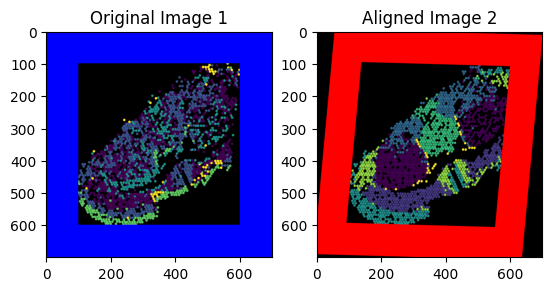

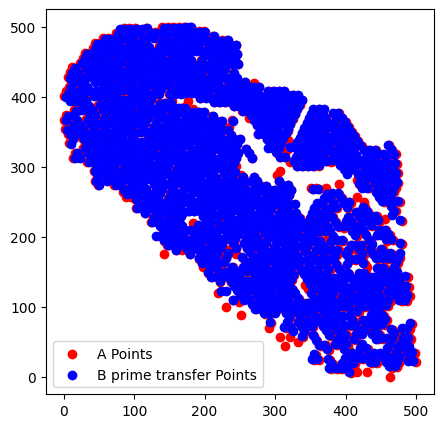

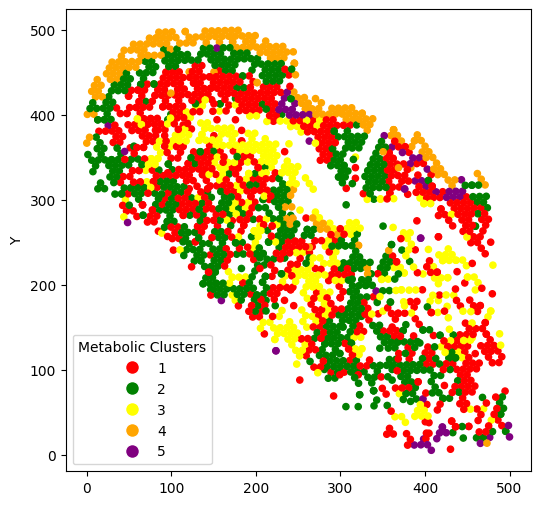

In [74]:
haCCA_work_dir = os.path.join(work_dir, 'haCCA')
if not os.path.exists(haCCA_work_dir):
    os.makedirs(haCCA_work_dir)
_b_prime = hacca.manual_gross_alignment(a, b_prime, work_dir=haCCA_work_dir)
_b_prime = hacca.further_alignment(a, _b_prime)
_a, _b_prime = hacca.icp_2d_with_feature_alignment(a, _b_prime)
b_preidct = hacca.direct_alignment(_a, _b_prime, work_dir=haCCA_work_dir)
b_predict_metric = hacca.direct_alignment_metric(_a, _b_prime)
haCCA = hacca.loss(b_preidct, b_truth)
hacca.plot_b_predict(b_preidct,haCCA_work_dir)
hacca_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(_a, _b_prime, b_predict_metric)
print(f"haCCA loss: {haCCA}, pairwise_alignment_accuracy: {hacca_pairwise_alignment_accuracy}")

Alignment pipeline 2: icp_3d_alignment | direct_alignment

anchor_points_pairs 36795
unique_anchor_points_pairs 1665
lenth of high_correlated_features_pairs 100
ICP 3D: loss: (1874.126834972423, 0.7175, 0.37880996370749886), pairwise_alignment_accuracy: 0.22456652435049104


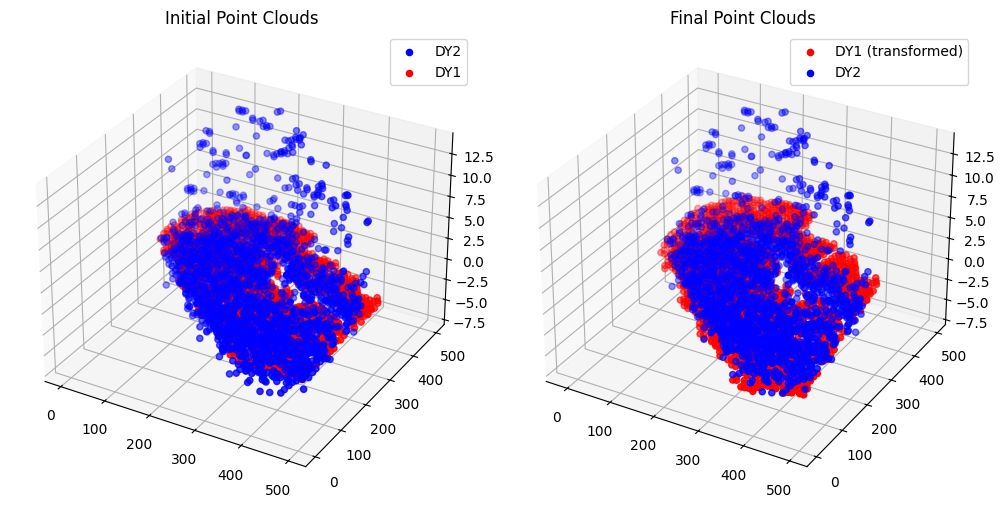

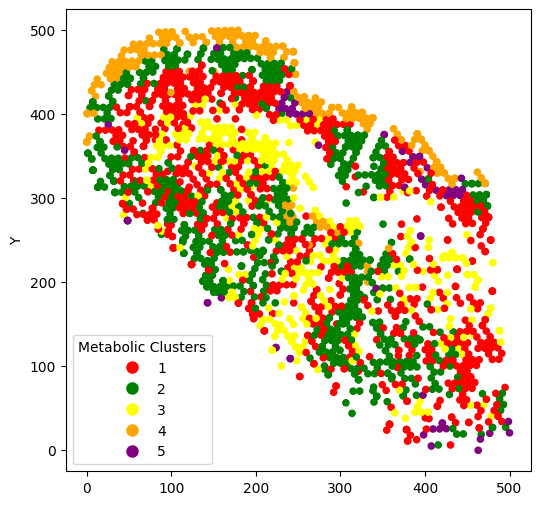

In [75]:
icp_3d_work_dir = os.path.join(work_dir, 'icp_3d')
if not os.path.exists(icp_3d_work_dir):
    os.makedirs(icp_3d_work_dir)
_a, _b_prime = hacca.icp_2d_with_feature_alignment(a, b_prime, icp_3d_work_dir)
b_predict = hacca.direct_alignment(_a, _b_prime, work_dir=icp_3d_work_dir)
b_predict_metric = hacca.direct_alignment_metric(_a, _b_prime)
hacca.plot_b_predict(b_predict, icp_3d_work_dir)
icp_3d_loss = hacca.loss(b_predict, b_truth)
icp_3d_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(_a, _b_prime, b_predict_metric)
print(f"ICP 3D: loss: {icp_3d_loss}, pairwise_alignment_accuracy: {icp_3d_pairwise_alignment_accuracy}")

Alignment pipeline 3: fgw_3d_alignment | direct_alignment

anchor_points_pairs 36795
unique_anchor_points_pairs 1665
lenth of high_correlated_features_pairs 100
FGW 3D: loss: (2654.592090324583, 0.5275, 0.13814978800774186), fgw_3d_pairwise_alignment_accuracy: 0.2191096668243782


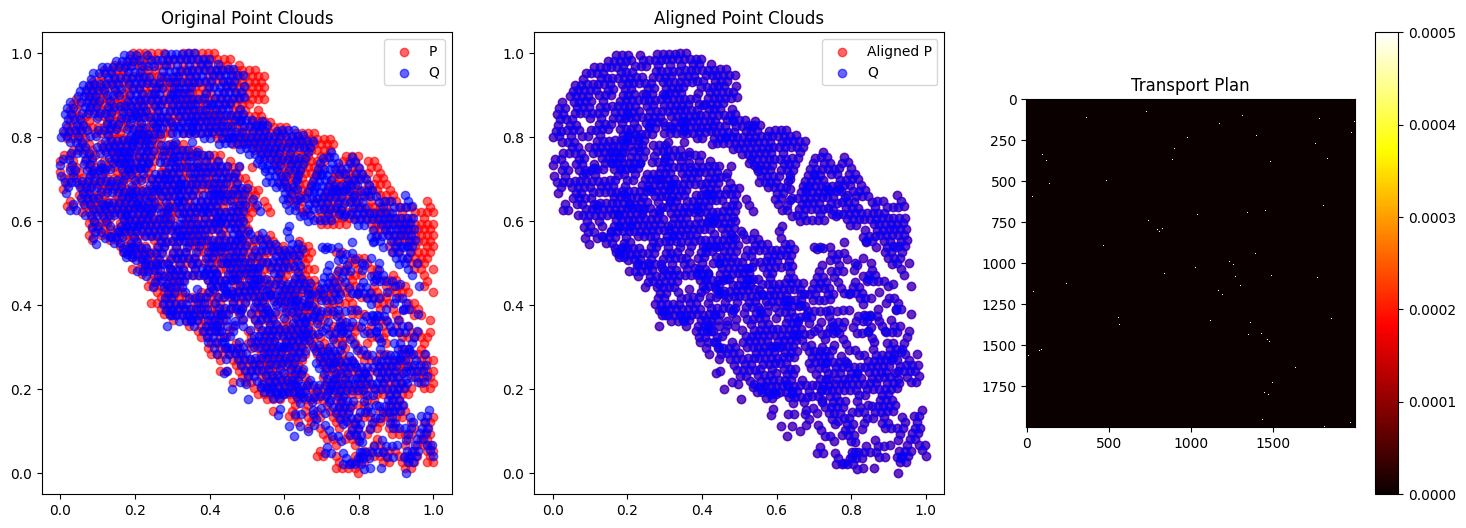

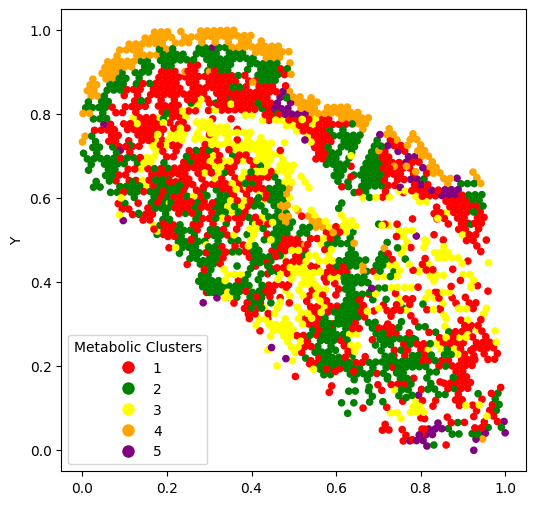

In [76]:
fgw_3d_work_dir = os.path.join(work_dir, 'fgw_3d')
if not os.path.exists(fgw_3d_work_dir):
        os.makedirs(fgw_3d_work_dir)
_a, _b_prime = hacca.fgw_3d_alignment(a, b_prime, fgw_3d_work_dir, alpha=0.8)
b_predict = hacca.direct_alignment(_a, _b_prime, work_dir=fgw_3d_work_dir)
pi = hacca.direct_alignment_metric(_a, _b_prime)
hacca.plot_b_predict(b_predict, fgw_3d_work_dir)
fgw_3d_loss = hacca.loss(b_predict, b_truth)
fgw_3d_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(_a, _b_prime, pi)
print(f"FGW 3D: loss: {fgw_3d_loss}, fgw_3d_pairwise_alignment_accuracy: {fgw_3d_pairwise_alignment_accuracy}")

Alignment pipeline 4: fgw_2d_alignment | direct_alignment

FGW 2D: loss: (2182.6191791726274, 0.6625, 0.29611504336557065), pairwise_alignment_accuracy: 0.22062746631327856


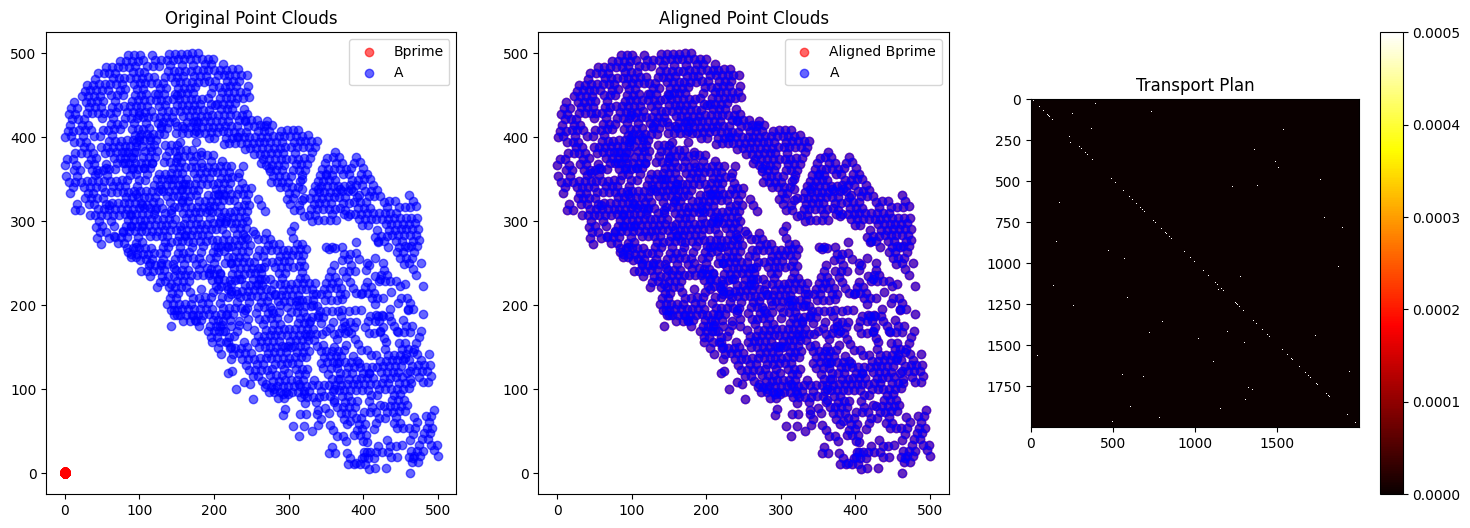

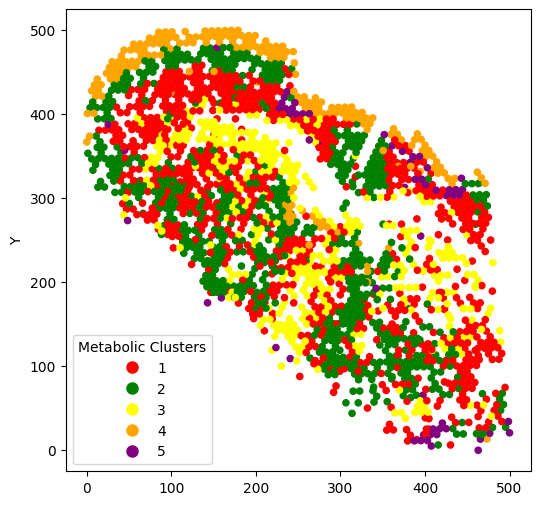

In [77]:
fgw_2d_work_dir = os.path.join(work_dir, 'fgw_2d')
if not os.path.exists(fgw_2d_work_dir):
        os.makedirs(fgw_2d_work_dir)
_b_prime = hacca.fgw_2d_alignment(a, b_prime, fgw_2d_work_dir)
b_predict = hacca.direct_alignment(a, _b_prime, work_dir=fgw_2d_work_dir)
pi = hacca.direct_alignment_metric(a, _b_prime)
hacca.plot_b_predict(b_predict, fgw_2d_work_dir)
fgw_2d_loss = hacca.loss(b_predict, b_truth)
fgw_2d_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(a, _b_prime, pi)
print(f"FGW 2D: loss: {fgw_2d_loss}, pairwise_alignment_accuracy: {fgw_2d_pairwise_alignment_accuracy}")

Alignment pipeline 5: icp_2d_alignment | direct_alignment

Converged after 82 iterations.
ICP 2D: loss: (2101.215185915059, 0.6545, 0.282137416606608), pairwise_alignment_accuracy: 0.22258811615856808


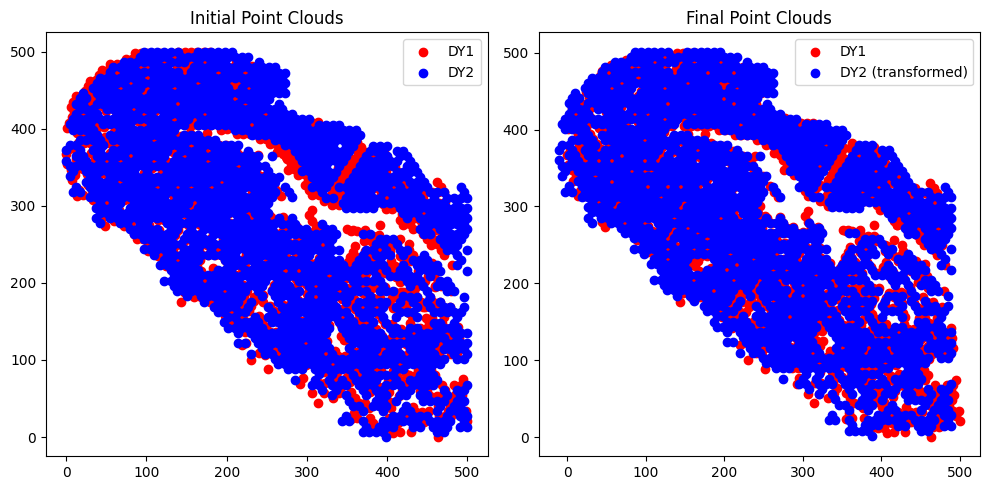

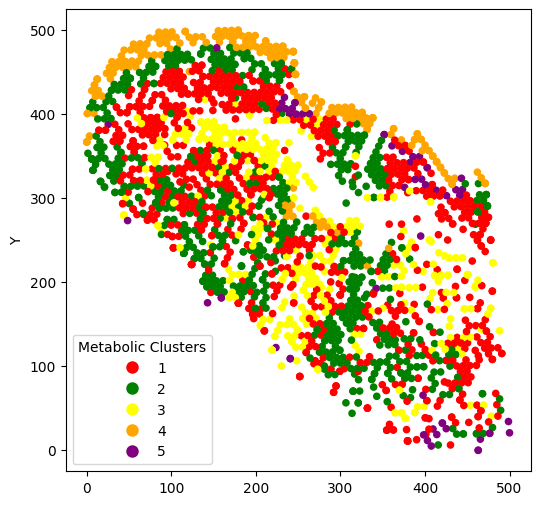

In [78]:
icp_2d_work_dir = os.path.join(work_dir, 'icp_2d')
if not os.path.exists(icp_2d_work_dir):
    os.makedirs(icp_2d_work_dir)

_b_prime = hacca.icp_2d_alignment(a, b_prime, icp_2d_work_dir)
b_predict = hacca.direct_alignment(a, _b_prime, work_dir=icp_2d_work_dir)
hacca.plot_b_predict(b_predict, icp_2d_work_dir)
pi = hacca.direct_alignment_metric(a, _b_prime)
icp_2d_loss = hacca.loss(b_predict, b_truth)
icp_2d_dir_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(a, _b_prime, pi)
print(f"ICP 2D: loss: {icp_2d_loss}, pairwise_alignment_accuracy: {icp_2d_dir_pairwise_alignment_accuracy}")

Alignment pipeline 6: direct_alignment

Direct alignment w/ center and scale: loss: (2226.198589215475, 0.664, 0.311561924090593), pairwise_alignment_accuracy: 0.22160038080956282


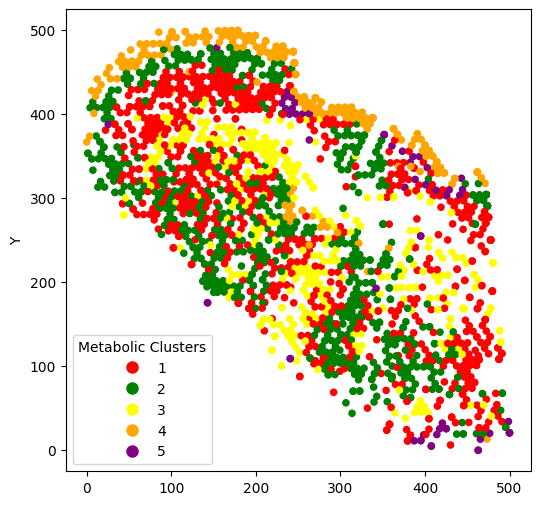

In [79]:
direct_alignment_work_dir = os.path.join(work_dir, 'direct_alignment')
if not os.path.exists(direct_alignment_work_dir):
    os.makedirs(direct_alignment_work_dir)
    
b_predict = hacca.direct_alignment(a, b_prime, direct_alignment_work_dir)
pi = hacca.direct_alignment_metric(a, b_prime)
hacca.plot_b_predict(b_predict, direct_alignment_work_dir)
direct_alignment_loss = hacca.loss(b_predict, b_truth)
direct_alignment_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(a, b_prime, pi)
print(f"Direct alignment w/ center and scale: loss: {direct_alignment_loss}, pairwise_alignment_accuracy: {direct_alignment_pairwise_alignment_accuracy}")


Alignment pipeline 7: manual_gross_alignment | direct_alignment

manual_alignment: loss: (1287.9511566457682, 0.9125, 0.7798739302482931), pairwise_alignment_accuracy: 0.22857404097390535


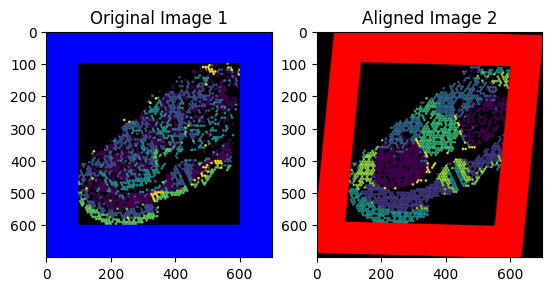

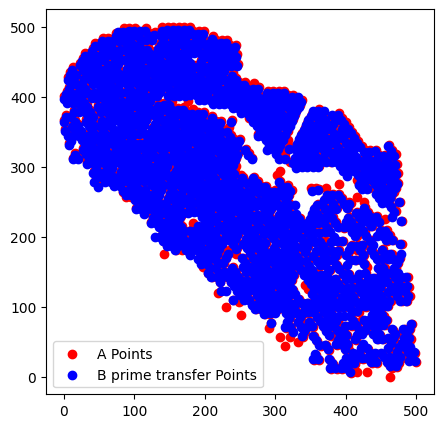

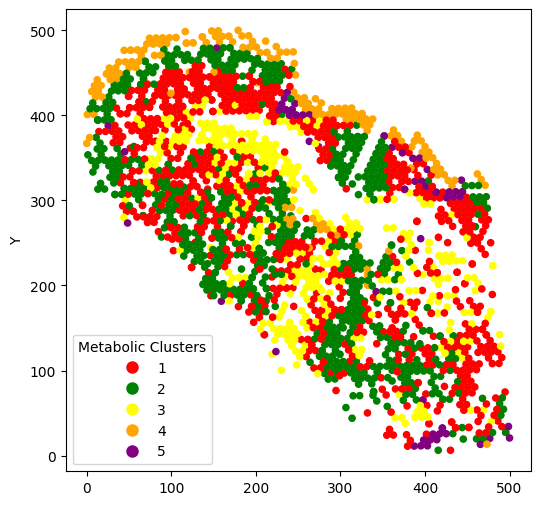

In [80]:
manual_alignment_work_dir = os.path.join(work_dir, 'manual alignment')
if not os.path.exists(manual_alignment_work_dir):
    os.makedirs(manual_alignment_work_dir)
_b_prime = hacca.manual_gross_alignment(a, b_prime, work_dir=manual_alignment_work_dir)
b_preidct = hacca.direct_alignment(a, _b_prime, work_dir=manual_alignment_work_dir)
pi = hacca.direct_alignment_metric(a, _b_prime)
manual_alignment = hacca.loss(b_preidct, b_truth)
manual_alignment_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(a, _b_prime, pi)
print(f"manual_alignment: loss: {manual_alignment}, pairwise_alignment_accuracy: {manual_alignment_pairwise_alignment_accuracy}")
hacca.plot_b_predict(b_preidct,manual_alignment_work_dir)

Alignment pipeline 8: icp_3d_alignment | fgw_3d_alignment | direct_alignment

anchor_points_pairs 17308
unique_anchor_points_pairs 1647


i:\mutiomics\pythonProject\.venv\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
i:\mutiomics\pythonProject\.venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


lenth of high_correlated_features_pairs 100
Run ICP2D_FGW3D alignment: loss: (2182.6191791726274, 0.6625, 0.29611504336557065), pairwise_alignment_accuracy: 0.22062543623313752


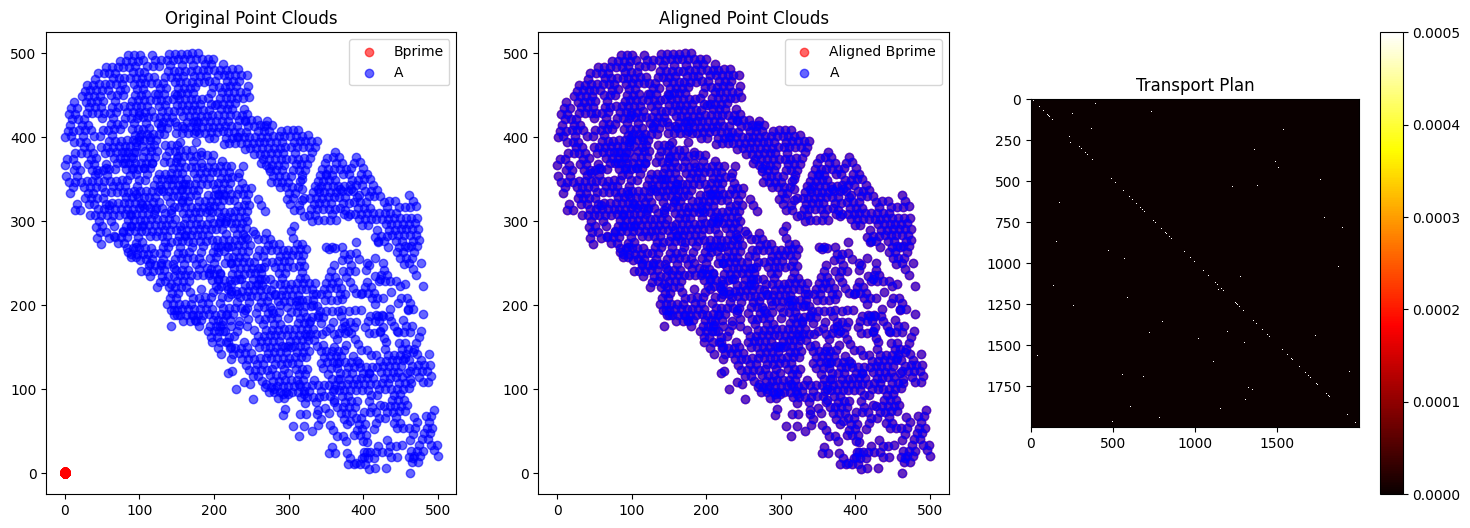

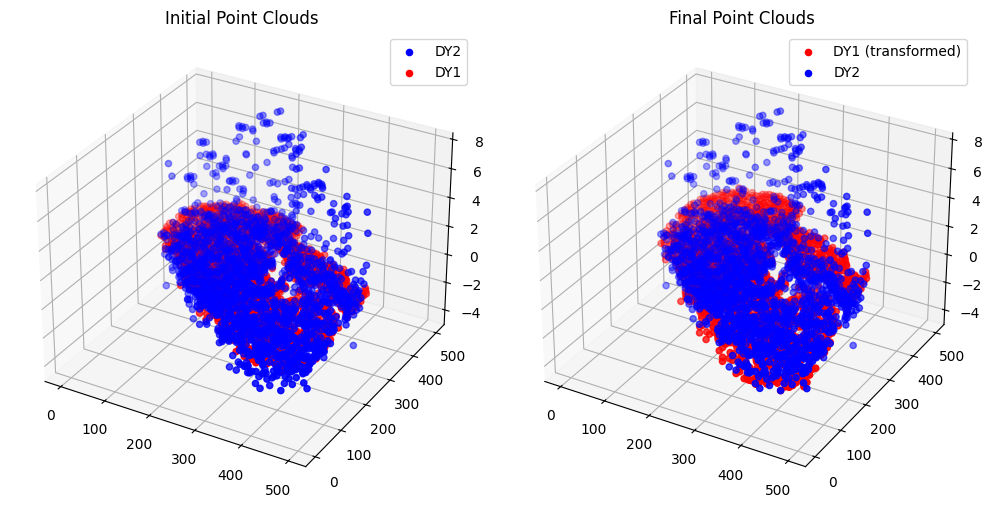

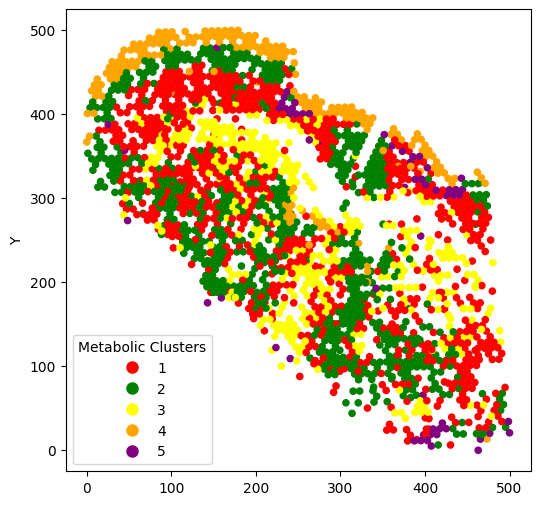

In [81]:
ICP2D_FGW3D_alignment_work_dir = os.path.join(work_dir, 'ICP2D_FGW3D')
if not os.path.exists(ICP2D_FGW3D_alignment_work_dir):
    os.makedirs(ICP2D_FGW3D_alignment_work_dir)
    
_b_prime = hacca.fgw_2d_alignment(a, b_prime, ICP2D_FGW3D_alignment_work_dir)
_a, _b_prime = hacca.icp_2d_with_feature_alignment(a, _b_prime, ICP2D_FGW3D_alignment_work_dir)
b_predict = hacca.direct_alignment(_a, _b_prime, ICP2D_FGW3D_alignment_work_dir)
pi = hacca.direct_alignment_metric(_a, _b_prime)
hacca.plot_b_predict(b_predict, ICP2D_FGW3D_alignment_work_dir)
ICD2D_FGW3D_alignment_loss = hacca.loss(b_predict, b_truth)
ICD2D_FGW3D_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(_a, _b_prime, pi)
print(f"Run ICP2D_FGW3D alignment: loss: {ICD2D_FGW3D_alignment_loss}, pairwise_alignment_accuracy: {ICD2D_FGW3D_pairwise_alignment_accuracy}")

Alignment pipeline 9: STalign

In [82]:
def process(a,b_prime):
    import matplotlib.pyplot as plt
    xJ = a.D[:, 0]
    yJ = a.D[:, 1]
    xI = b_prime.D[:, 0]
    yI = b_prime.D[:, 1]
    XI,YI,I,fig = STalign.rasterize(xI,yI,dx=30,blur=1.5)
    XJ,YJ,J,fig = STalign.rasterize(xJ,yJ,dx=30, blur=1.5)
    extentI = STalign.extent_from_x((YI,XI))
    extentJ = STalign.extent_from_x((YJ,XJ))
    #run LDDMM
    #specify device (default device for STalign.LDDMM is cpu)
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    
    # keep all other parameters default
    params = {
                'niter': 1000,
                'device':device,
                'epV': 50
              }
    
    out = STalign.LDDMM([YI,XI],I,[YJ,XJ],J,**params)
    # get necessary output variables
    A = out['A']
    v = out['v']
    xv = out['xv']
    # set device for building tensors
    if torch.cuda.is_available():
        torch.set_default_device('cuda:0')
    else:
        torch.set_default_device('cpu')
        # apply transform
    phii = STalign.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
    phiI = STalign.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])
    
    #switch tensor from cuda to cpu for plotting with numpy
    if phii.is_cuda:
        phii = phii.cpu()
    if phiI.is_cuda:
        phiI = phiI.cpu()
    # transform is invertible
    phi = STalign.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
    phiiJ = STalign.transform_image_target_to_source(xv,v,A,[YJ,XJ],J,[YI,XI])
    
    #switch tensor from cuda to cpu for plotting with numpy
    if phi.is_cuda:
        phi = phi.cpu()
    if phiiJ.is_cuda:
        phiiJ = phiiJ.cpu()
    # apply transform to original points
    tpointsI= STalign.transform_points_source_to_target(xv,v,A, np.stack([yI, xI], 1).astype(np.double))
    
    #switch tensor from cuda to cpu for plotting with numpy
    if tpointsI.is_cuda:
        tpointsI = tpointsI.cpu()
    
    #switch from row column coordinates (y,x) to (x,y)
    xI_LDDMM = tpointsI[:,1]
    yI_LDDMM = tpointsI[:,0]
    df3 = pd.DataFrame(
    
        {
    
            "x": xI_LDDMM,
    
            "y": yI_LDDMM,
           
        },
    
    )
    b_prime.D=df3.to_numpy()
   

    return b_prime


0 of 2000
1999 of 2000
0 of 2000
1999 of 2000


i:\mutiomics\pythonProject\.venv\lib\site-packages\torch\utils\_device.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
i:\mutiomics\pythonProject\.venv\lib\site-packages\STalign\STalign.py:1301: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


Run STalign_alignment: loss: (2118.5002376217685, 0.6485, 0.2703075549417604), pairwise_alignment_accuracy: 0.22259030909677932


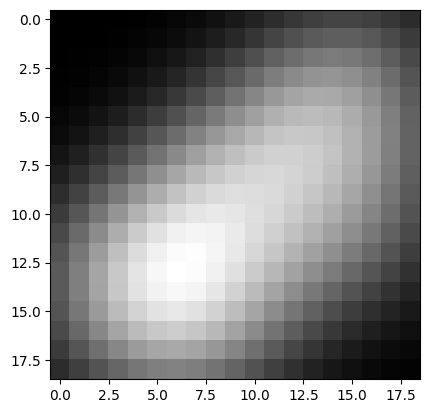

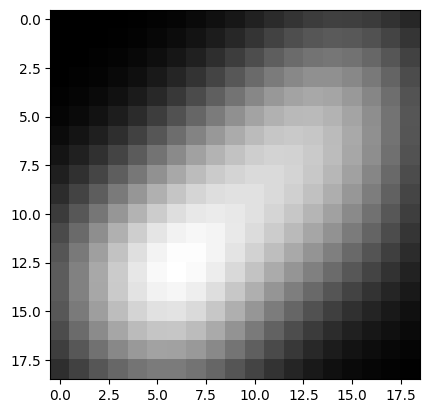

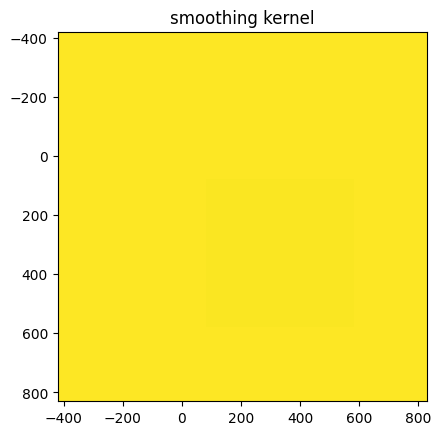

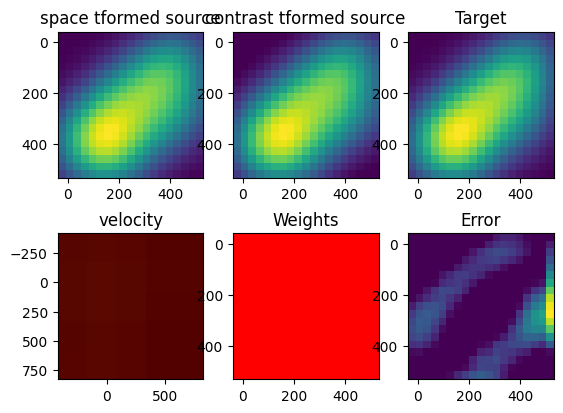

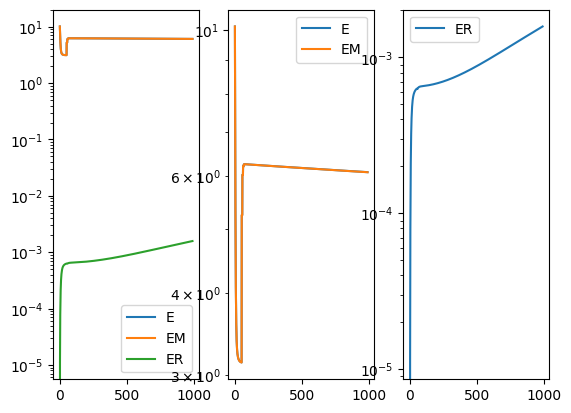

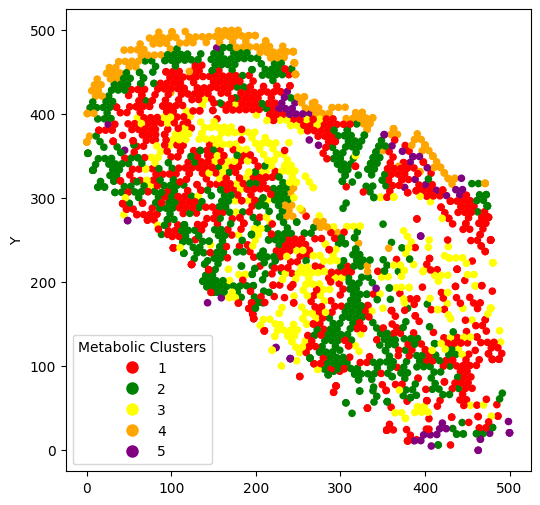

In [83]:
STalign_alignment_work_dir = os.path.join(work_dir, 'STalign')
if not os.path.exists(STalign_alignment_work_dir):
    os.makedirs(STalign_alignment_work_dir)
_b_prime = process(a,b_prime)
b_predict = hacca.direct_alignment(a, _b_prime, STalign_alignment_work_dir)
pi = hacca.direct_alignment_metric(a, _b_prime)
hacca.plot_b_predict(b_predict, STalign_alignment_work_dir)
STalign_alignment_loss = hacca.loss(b_predict, b_truth)
STalign_pairwise_alignment_accuracy = hacca.pairwise_alignment_accuracy(a, _b_prime, pi)
print(f"Run STalign_alignment: loss: {STalign_alignment_loss}, pairwise_alignment_accuracy: {STalign_pairwise_alignment_accuracy}")

In [84]:
print(f"haCCA: loss: {haCCA}, pairwise_alignment_accuracy: {hacca_pairwise_alignment_accuracy}")
print(f"FWG2D-ICP3D alignment: loss: {ICD2D_FGW3D_alignment_loss}, pairwise_alignment_accuracy: {ICD2D_FGW3D_pairwise_alignment_accuracy}")
print(f"manual_alignment: loss: {manual_alignment}, pairwise_alignment_accuracy: {manual_alignment_pairwise_alignment_accuracy}")
print(f"Direct alignment: loss: {direct_alignment_loss}, pairwise_alignment_accuracy: {direct_alignment_pairwise_alignment_accuracy}")
print(f"ICP 2D: loss: {icp_2d_loss}, pairwise_alignment_accuracy: {icp_2d_dir_pairwise_alignment_accuracy}")
print(f"FGW 2D: loss: {fgw_2d_loss}, pairwise_alignment_accuracy: {fgw_2d_pairwise_alignment_accuracy}")
print(f"FGW 3D: loss: {fgw_3d_loss}, pairwise_alignment_accuracy: {fgw_3d_pairwise_alignment_accuracy}")
print(f"ICP 3D: loss: {icp_3d_loss}, pairwise_alignment_accuracy: {icp_3d_pairwise_alignment_accuracy}")
print(f"STalign_alignment: loss: {STalign_alignment_loss}, pairwise_alignment_accuracy: {STalign_pairwise_alignment_accuracy}")

haCCA: loss: (1148.3132414705385, 0.92, 0.7944327776464186), pairwise_alignment_accuracy: 0.2305516791402353
FWG2D-ICP3D alignment: loss: (2182.6191791726274, 0.6625, 0.29611504336557065), pairwise_alignment_accuracy: 0.22062543623313752
manual_alignment: loss: (1287.9511566457682, 0.9125, 0.7798739302482931), pairwise_alignment_accuracy: 0.22857404097390535
Direct alignment: loss: (2226.198589215475, 0.664, 0.311561924090593), pairwise_alignment_accuracy: 0.22160038080956282
ICP 2D: loss: (2101.215185915059, 0.6545, 0.282137416606608), pairwise_alignment_accuracy: 0.22258811615856808
FGW 2D: loss: (2182.6191791726274, 0.6625, 0.29611504336557065), pairwise_alignment_accuracy: 0.22062746631327856
FGW 3D: loss: (2654.592090324583, 0.5275, 0.13814978800774186), pairwise_alignment_accuracy: 0.2191096668243782
ICP 3D: loss: (1874.126834972423, 0.7175, 0.37880996370749886), pairwise_alignment_accuracy: 0.22456652435049104
STalign_alignment: loss: (2118.5002376217685, 0.6485, 0.2703075549417

In [85]:
print(f"AC:\t{haCCA[1]*100:.2f}\t{manual_alignment[1]*100:.2f}\t{direct_alignment_loss[1]*100:.2f}\t{STalign_alignment_loss[1]*100:.2f}\t{icp_2d_loss[1]*100:.2f}\tAC")
print(f"ARI:\t{haCCA[2]:.2f}\t{manual_alignment[2]:.2f}\t{direct_alignment_loss[2]:.2f}\t{STalign_alignment_loss[2]:.2f}\t{icp_2d_loss[2]:.2f}\tARI")
print(f"LOSS:\t{haCCA[0]:.2f}\t{manual_alignment[0]:.2f}\t{direct_alignment_loss[0]:.2f}\t{STalign_alignment_loss[0]:.2f}\t{icp_2d_loss[0]:.2f}\tLOSS")
print(f"PAC:\t{hacca_pairwise_alignment_accuracy:.2f}\t{manual_alignment_pairwise_alignment_accuracy:.2f}\t{direct_alignment_pairwise_alignment_accuracy:.2f}\t{STalign_pairwise_alignment_accuracy:.2f}\t{icp_2d_dir_pairwise_alignment_accuracy:.2f}\tPAC")

AC:	92.00	91.25	66.40	64.85	65.45	AC
ARI:	0.79	0.78	0.31	0.27	0.28	ARI
LOSS:	1148.31	1287.95	2226.20	2118.50	2101.22	LOSS
PAC:	0.23	0.23	0.22	0.22	0.22	PAC
